In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

In [8]:
data=pd.read_csv("/content/gold_price_data.csv",index_col="Date",parse_dates=True)
data=data.dropna()
print("The shape of the data is= ",data.shape)
data.head()

The shape of the data is=  (10787, 1)


,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


<Axes: xlabel='Date'>

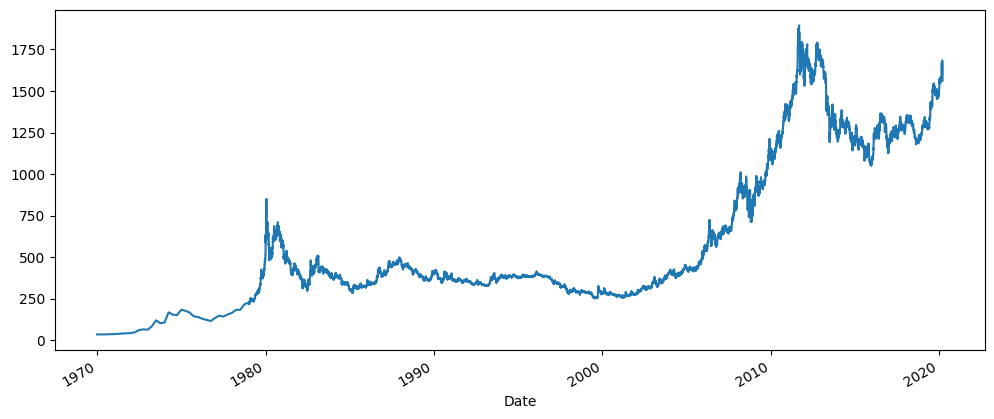

In [6]:
#plot
data["Value"].plot(figsize=(12,5))

In [16]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  res=adfuller(dataset,autolag='AIC')
  print("ADF: ",res[0])
  print("P value: ",res[1])
  print("No of lags: ",res[2])
  print("No of observations: ",res[3])
  print("Critical values: ")
  for key,val in res[4].items():
    print("\t",key,": ",val)

In [18]:
ad_test(data["Value"])

ADF:  -0.07112124453813186
P value:  0.9522400769147397
No of lags:  39
No of observations:  10747
Critical values: 
	 1% :  -3.4309586221840513
	 5% :  -2.861808976860248
	 10% :  -2.566913171245489


In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [23]:
stepwise_arima=auto_arima(data["Value"],trace=True,supress_warnings=True)
stepwise_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78048.396, Time=35.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78090.196, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78090.620, Time=1.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78090.554, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78090.847, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78081.191, Time=14.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78081.126, Time=14.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78049.951, Time=37.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78084.745, Time=20.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78088.281, Time=11.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=78082.704, Time=20.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78082.775, Time=15.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78086.029, Time=46.83 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=78049.141, Time=8.50 sec

Best mode

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10787
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -39018.198
Date:                Sun, 24 Sep 2023   AIC                          78048.396
Time:                        18:30:09   BIC                          78092.112
Sample:                             0   HQIC                         78063.138
                              - 10787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3741      0.229      1.634      0.102      -0.075       0.823
ar.L1         -0.7037      0.011    -65.182      0.000      -0.725      -0.683
ar.L2         -0.9374      0.010    -93.070      0.000      -0.957      -0.918
ma.L1          0.6845      0.012     55.768      0.000       0.660       0.709
ma.L2          0.9173      0.012     79.015      0.000       0.895       0.940
sigma2        81.2136      0.328    247.846      0.000      80.571      81.856
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):            210441.39
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima.model import ARIMA


In [26]:
train=data.iloc[:-50]
test=data.iloc[-50:]
print(train.shape,test.shape)

(10737, 1) (50, 1)


In [27]:
model=ARIMA(data["Value"],order=(2,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                10787
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -39019.571
Date:                Sun, 24 Sep 2023   AIC                          78049.141
Time:                        18:37:41   BIC                          78085.571
Sample:                             0   HQIC                         78061.426
                              - 10787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7038      0.011    -65.257      0.000      -0.725      -0.683
ar.L2         -0.9375      0.010    -93.264      0.000      -0.957      -0.918
ma.L1          0.6847      0.012     55.852      0.000       0.661       0.709
ma.L2          0.9174      0.012     79.170      0.000       0.895       0.940
sigma2        81.2352      0.325    249.806      0.000      80.598      81.873
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):            210438.75
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
#predicting on test data
start,end=len(train),len(test)+len(train)-1
pred=model.predict(start=start,end=end,typ='levels')
# print(pred)
pred.index=data.index[start:end+1]
print(pred)

Date
2020-01-06    1548.727234
2020-01-07    1572.992086
2020-01-08    1567.556923
2020-01-09    1572.276355
2020-01-10    1551.119815
2020-01-13    1553.418073
2020-01-14    1549.699065
2020-01-15    1545.570784
2020-01-16    1548.883515
2020-01-17    1554.013134
2020-01-20    1557.904584
2020-01-21    1560.323897
2020-01-22    1551.020092
2020-01-23    1557.002252
2020-01-24    1562.859347
2020-01-27    1564.086789
2020-01-28    1579.952124
2020-01-29    1574.096853
2020-01-30    1573.652293
2020-01-31    1577.941606
2020-02-03    1584.015122
2020-02-04    1575.221395
2020-02-05    1558.701039
2020-02-06    1553.053089
2020-02-07    1563.056505
2020-02-10    1572.663258
2020-02-11    1573.216170
2020-02-12    1570.517519
2020-02-13    1563.857774
2020-02-14    1574.844632
2020-02-17    1581.046338
2020-02-18    1581.114656
2020-02-19    1589.797478
2020-02-20    1603.490457
2020-02-21    1618.962190
2020-02-24    1643.213806
2020-02-25    1670.712372
2020-02-26    1650.861751
2020-02

<Axes: xlabel='Date'>

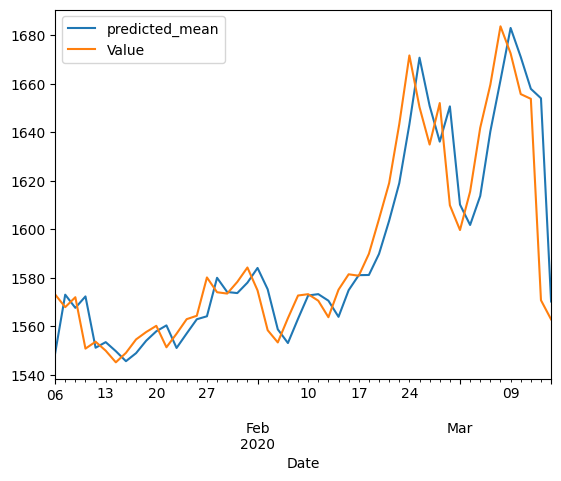

In [30]:
pred.plot(legend=True)
test['Value'].plot(legend=True)

In [32]:
test['Value'].mean()

1590.3339999999998

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Value']))
print(rmse)

18.08471319918281


In [35]:
model2=ARIMA(data["Value"],order=(2,1,2))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                10787
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -39019.571
Date:                Sun, 24 Sep 2023   AIC                          78049.141
Time:                        18:41:10   BIC                          78085.571
Sample:                             0   HQIC                         78061.426
                              - 10787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7038      0.011    -65.257      0.000      -0.725      -0.683
ar.L2         -0.9375      0.010    -93.264      0.000      -0.957      -0.918
ma.L1          0.6847      0.012     55.852      0.000       0.661       0.709
ma.L2          0.9174      0.012     79.170      0.000       0.895       0.940
sigma2        81.2352      0.325    249.806      0.000      80.598      81.873
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):            210438.75
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
#predict future data
index_date_range=pd.date_range(start='2023-01-01',end='2023-01-31')
pred=model2.predict(start=len(data),end=len(data)+30,typ='levels').rename("ARIMA Predictions")
pred.index=index_date_range
print(pred)

2023-01-01    1564.757110
2023-01-02    1564.014158
2023-01-03    1562.702287
2023-01-04    1564.322160
2023-01-05    1564.411901
2023-01-06    1562.830104
2023-01-07    1563.859311
2023-01-08    1564.617847
2023-01-09    1563.119072
2023-01-10    1563.462849
2023-01-11    1564.625987
2023-01-12    1563.485027
2023-01-13    1563.197642
2023-01-14    1564.469568
2023-01-15    1563.843753
2023-01-16    1563.091797
2023-01-17    1564.207760
2023-01-18    1564.127255
2023-01-19    1563.137701
2023-01-20    1563.909667
2023-01-21    1564.294031
2023-01-22    1563.299779
2023-01-23    1563.639236
2023-01-24    1564.332424
2023-01-25    1563.526286
2023-01-26    1563.443817
2023-01-27    1564.257618
2023-01-28    1563.762143
2023-01-29    1563.347941
2023-01-30    1564.103984
2023-01-31    1563.960162
Freq: D, Name: ARIMA Predictions, dtype: float64
